       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]
Index(['carat', 'cut', 'color', 'clarity', 'depth

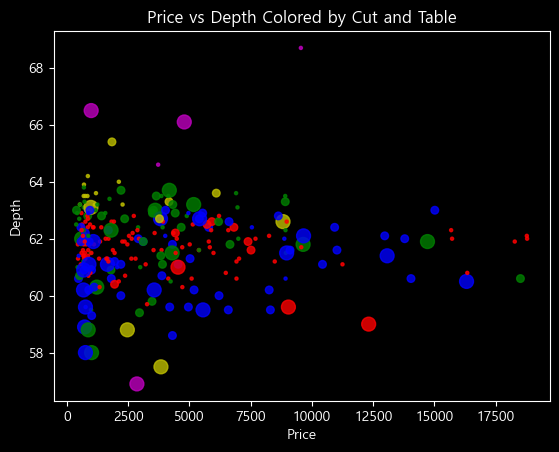

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
cnt, PNG, UNDERBAR=0, '.png', '_'
CHART_NAME = 'scatterPlot_color_Practice'
filename = './../data/diamonds.csv'
diamonds = pd.read_csv(filename)
print(diamonds)

# 데이터 일부분 샘플링
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)

print(diamonds.columns)

print(diamonds.head())

# x축 y축 지정
xdata = diamonds['price']
ydata = diamonds['depth']
table = diamonds['table'] # 원의 크기

print(table.max())
print(table.min())

# 컷 품질에 따른 색상
mycolor = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
print('cut_list')
print(cut_list)

cut_dict = {cut_list[idx] : mycolor[idx] for idx in range(len(cut_list))}
print('cut_dict')
print(cut_dict)

#컷 품질에 따른 색상 반환
def recode_cut(cut):
    return cut_dict[cut]

# 문자열 데이터를 숫자형으로 변환
diamonds['newcut'] = diamonds['cut'].apply(recode_cut)
newcut = diamonds['newcut'] # 범주형 자료 숫자형

# 차트에 그려지는 원 크기를 지정
def recode_table(table):
    if table >= 60:
        return 100
    elif table >= 58:
        return 30
    elif table >= 54:
        return 5
    else:
        return 1
diamonds['newtable'] = diamonds['table'].apply(recode_table)
newtable = diamonds['newtable'] # 범주형 자료 숫자형

print(diamonds.loc[:,['price', 'depth', 'newtable', 'table', 'newcut']])

scatter_plot = plt.figure()
ax1 = scatter_plot.add_subplot(1, 1, 1)

#매개변수 s=도형의 크기를 지정, c= 색상 이름 또는 숫자의 연속형
ax1.scatter(x=xdata, y=ydata, s=newtable, c=newcut, alpha=0.8)

ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + '파일이 저장되었습니다.')